In [1]:
import random
import os
import sys
import time
import meshplot as mp
import import_ipynb
import igl
import matplotlib.pyplot as plt


import partitioning
import spectral_decomposition
import distortion
import attacks


importing Jupyter notebook from partitioning.ipynb
importing Jupyter notebook from spectral_decomposition.ipynb
importing Jupyter notebook from embedding.ipynb
importing Jupyter notebook from retrieval.ipynb
importing Jupyter notebook from distortion.ipynb
importing Jupyter notebook from attacks.ipynb


In [2]:
def embed_and_extract(patches = 60,strength = 100,data = [0, 1]*32):
    embed(patches,strength)
    errors = extract(patches,strength)
    return errors
  

In [3]:
def embed(patches = 60,strength = 100,data = [0, 1]*32):

    original_filename = "source_models/bunny.ply"
    watermarked_filename = "watermarked_models/bunny_strength"+str(strength)+ "_patches" + str(patches) + ".ply"

    # Insertion of the watermark
    embed_start = time.time()
    capacity = spectral_decomposition.insert(original_filename, watermarked_filename, data, 123456, strength, patches)
    embed_end = time.time()
    
    print(capacity," bits inserted")
    print(" ")
    print("Time to embed watermark: ", embed_end - embed_start)
    print(" ")
    print(" ")
    

In [4]:
def extract(patches = 60,strength = 100,data = [0, 1]*32):
    
    original_filename = "source_models/bunny.ply"
    watermarked_filename = "watermarked_models/bunny_strength"+str(strength)+ "_patches" + str(patches) + ".ply"
    
     # Extraction of the watermark
    extract_start = time.time()
    retrieved = spectral_decomposition.extract(watermarked_filename, 123456, 64, strength, patches,original_filename)
    extract_end = time.time()
    
    print("Time taken to embed watermark: ", extract_end - extract_start)
    print(" ")
    
    # Compute the number of errors
    errors = 0
    for i in range(len(data)):
        if data[i] != retrieved[i]:
            errors +=1
            
    original_mesh = igl.read_triangle_mesh(original_filename)
    watermarked_mesh = igl.read_triangle_mesh(watermarked_filename)

    rms = distortion.rms_error(original_mesh, watermarked_mesh)
    print("RMS Error Computed: ",rms)
    print(" ")
    
    hausdorff = distortion.hausdorff_distance(original_mesh, watermarked_mesh)
    print("Hausdorff Distance Computed: ", hausdorff)
    print(" ")
    
    smoothness = distortion.local_smoothness(original_mesh, watermarked_mesh)
    print("Local Smoothness Computed ", smoothness)
    print(" ")
    
    print("number of errors: ", errors)
    print(" ")
    
    print("Original Mesh")
    mp.plot(original_mesh[0],original_mesh[1])
    print(" ")
    
    print("Watermarked Mesh")
    mp.plot(watermarked_mesh[0],watermarked_mesh[1])
    
    return errors

In [5]:
def noise_attack():
    
    data = [0, 1]*32
    
    patches = 20
    strength = 5
    amplitude = 0.001
    
    in_name = "source_models/bunny.ply"
    filename = "watermarked_models/bunny_strength"+str(strength)+ "_patches" + str(patches) + ".ply"
    original_mesh = igl.read_triangle_mesh(in_name)

    watermarked_mesh = igl.read_triangle_mesh(filename)
    watermarkedVertices = watermarked_mesh[0]
    watermarkedFaces = watermarked_mesh[1]
    
    file_noisy = "watermarked_models/bunny_strength"+str(strength)+ "_patches" + str(patches) + "_amplitude" + str(amplitude) + ".ply"
    # Add random noise to the model then save it
    noise_mesh = attacks.noise(watermarked_mesh, amplitude)
    mp.plot(noise_mesh[0],noise_mesh[1])
    igl.write_triangle_mesh(file_noisy,noise_mesh[0],noise_mesh[1])
    # Extraction of the watermark
    retrieved = spectral_decomposition.extract(file_noisy, 123456, 64, strength, patches,in_name)
    # Compute the number of errors
    n_errors = len([x for x, y in zip(data, retrieved) if x != y])
    # Write the results to a file
    print("Number of errors: ",n_errors)
        

In [6]:
def smooth_attack():
    
    data = [0, 1]*32
    
    patches = 60
    strength = 100
    iterations = 1

    in_name = "source_models/hand.ply"
    filename = "watermarked_models/hand_strength"+str(strength)+ "_patches" + str(patches) + ".ply"
    original_mesh = igl.read_triangle_mesh(in_name)

    watermarked_mesh = igl.read_triangle_mesh(filename)
    watermarkedVertices = watermarked_mesh[0]
    watermarkedFaces = watermarked_mesh[1]
       
    file_smoothed = "watermarked_models/bunny_strength"+str(strength)+ "_patches" + str(patches) + "_iterations" + str(iterations) + ".ply"
    # Smooth the model then save it

    new_mesh = attacks.smoothing(watermarked_mesh, iterations)
    mp.plot(new_mesh[0],new_mesh[1])
    igl.write_triangle_mesh(file_smoothed, new_mesh[0], new_mesh[1])
    # Extraction of the watermark
    retrieved = spectral_decomposition.extract(file_smoothed, 123456, 64, strength, patches,in_name)
    # Compute the number of errors
    n_errors = len([x for x, y in zip(data, retrieved) if x != y])
    # Write the results to a file
    print("Number of errors: ",n_errors)
    

[0.0, 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009000000000000001, 0.01]
[[-0.0378297   0.12794     0.00447467]
 [-0.0447794   0.128887    0.00190497]
 [-0.0680095   0.151244    0.0371953 ]
 ...
 [-0.0704544   0.150585   -0.0434585 ]
 [-0.0310262   0.15372799 -0.00354608]
 [-0.0400442   0.15362    -0.00816685]]
[[20399 21215 21216]
 [14838  9280  9186]
 [ 5187 13433 16020]
 ...
 [17279 34909 17346]
 [17277 17346 34909]
 [17345 17346 17277]]
Partitioning mesh...
35947
69451


Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(-0.016840…

Step 1: Mesh patched
Inserting data in  72  submeshes
Data inserted
Only %s bits inserted, the bit error rate when retriving data might be significant 0
########## Embedding finished ##########
0  bits inserted
 
Time to embed watermark:  23.78158140182495
 
 
########## Retrieval started ##########
35947
69451


Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(-0.016840…

Step 1: Mesh patched
Step 2: Data retrieved
########## Retrieval finished ##########
Time taken to embed watermark:  24.802305936813354
 
RMS Error Computed:  4.315823627187902
 
Hausdorff Distance Computed:  0.03454435636401416
 
Local Smoothness Computed  0.0037839507792421186
 
number of errors:  32
 
Original Mesh


Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(-0.016840…

 
Watermarked Mesh


Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(-0.016840…

Partitioning mesh...
35947
69451


Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(-0.016840…

Step 1: Mesh patched
Inserting data in  72  submeshes
Data inserted
########## Embedding finished ##########
72  bits inserted
 
Time to embed watermark:  42.92881631851196
 
 
########## Retrieval started ##########
35947
69451


Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(-0.016840…

Step 1: Mesh patched
Step 2: Data retrieved
########## Retrieval finished ##########
Time taken to embed watermark:  25.12161946296692
 
RMS Error Computed:  4.315823883282038
 
Hausdorff Distance Computed:  0.03454435636401416
 
Local Smoothness Computed  0.0037870998657202116
 
number of errors:  14
 
Original Mesh


Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(-0.016840…

 
Watermarked Mesh


Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(-0.016840…

Partitioning mesh...
35947
69451


Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(-0.016840…

Step 1: Mesh patched
Inserting data in  72  submeshes
Data inserted
########## Embedding finished ##########
113  bits inserted
 
Time to embed watermark:  36.157095193862915
 
 
########## Retrieval started ##########
35947
69451


Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(-0.016840…

Step 1: Mesh patched
Step 2: Data retrieved
########## Retrieval finished ##########
Time taken to embed watermark:  27.540111541748047
 
RMS Error Computed:  4.315824323098201
 
Hausdorff Distance Computed:  0.03454435636401416
 
Local Smoothness Computed  0.0037900786046315377
 
number of errors:  6
 
Original Mesh


Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(-0.016840…

 
Watermarked Mesh


Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(-0.016840…

Partitioning mesh...
35947
69451


Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(-0.016840…

Step 1: Mesh patched
Inserting data in  72  submeshes
Data inserted
########## Embedding finished ##########
153  bits inserted
 
Time to embed watermark:  30.053536415100098
 
 
########## Retrieval started ##########
35947
69451


Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(-0.016840…

Step 1: Mesh patched
Step 2: Data retrieved
########## Retrieval finished ##########
Time taken to embed watermark:  18.413551568984985
 
RMS Error Computed:  4.315824481349162
 
Hausdorff Distance Computed:  0.03454435636401416
 
Local Smoothness Computed  0.0037919460728044227
 
number of errors:  5
 
Original Mesh


Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(-0.016840…

 
Watermarked Mesh


Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(-0.016840…

Partitioning mesh...
35947
69451


Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(-0.016840…

Step 1: Mesh patched
Inserting data in  72  submeshes
Data inserted
########## Embedding finished ##########
187  bits inserted
 
Time to embed watermark:  29.42056179046631
 
 
########## Retrieval started ##########
35947
69451


Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(-0.016840…

Step 1: Mesh patched
Step 2: Data retrieved
########## Retrieval finished ##########
Time taken to embed watermark:  30.394510746002197
 
RMS Error Computed:  4.315824918567341
 
Hausdorff Distance Computed:  0.03454435636401416
 
Local Smoothness Computed  0.003794334080636386
 
number of errors:  6
 
Original Mesh


Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(-0.016840…

 
Watermarked Mesh


Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(-0.016840…

Partitioning mesh...
35947
69451


Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(-0.016840…

Step 1: Mesh patched
Inserting data in  72  submeshes
Data inserted
########## Embedding finished ##########
228  bits inserted
 
Time to embed watermark:  25.208174467086792
 
 
########## Retrieval started ##########
35947
69451


Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(-0.016858…

Step 1: Mesh patched
Step 2: Data retrieved
########## Retrieval finished ##########
Time taken to embed watermark:  29.903437614440918
 
RMS Error Computed:  4.315825514012628
 
Hausdorff Distance Computed:  0.03454435636401416
 
Local Smoothness Computed  0.003797355014726252
 
number of errors:  5
 
Original Mesh


Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(-0.016840…

 
Watermarked Mesh


Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(-0.016858…

Partitioning mesh...
35947
69451


Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(-0.016840…

Step 1: Mesh patched
Inserting data in  72  submeshes
Data inserted
########## Embedding finished ##########
266  bits inserted
 
Time to embed watermark:  36.72211456298828
 
 
########## Retrieval started ##########
35947
69451


Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(-0.016858…

Step 1: Mesh patched
Step 2: Data retrieved
########## Retrieval finished ##########
Time taken to embed watermark:  23.561305284500122
 
RMS Error Computed:  4.3158259208076295
 
Hausdorff Distance Computed:  0.03454435636401416
 
Local Smoothness Computed  0.003799398940220688
 
number of errors:  4
 
Original Mesh


Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(-0.016840…

 
Watermarked Mesh


Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(-0.016858…

Partitioning mesh...
35947
69451


Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(-0.016840…

Step 1: Mesh patched
Inserting data in  72  submeshes
Data inserted
########## Embedding finished ##########
305  bits inserted
 
Time to embed watermark:  22.154556035995483
 
 
########## Retrieval started ##########
35947
69451


Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(-0.016858…

Step 1: Mesh patched
Step 2: Data retrieved
########## Retrieval finished ##########
Time taken to embed watermark:  29.59736394882202
 
RMS Error Computed:  4.315826326818362
 
Hausdorff Distance Computed:  0.03454435636401416
 
Local Smoothness Computed  0.003801378512319827
 
number of errors:  1
 
Original Mesh


Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(-0.016840…

 
Watermarked Mesh


Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(-0.016858…

Partitioning mesh...
35947
69451


Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(-0.016840…

Step 1: Mesh patched
Inserting data in  72  submeshes
Data inserted
########## Embedding finished ##########
346  bits inserted
 
Time to embed watermark:  50.303386926651
 
 
########## Retrieval started ##########
35947
69451


Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(-0.016858…

Step 1: Mesh patched
Step 2: Data retrieved
########## Retrieval finished ##########
Time taken to embed watermark:  22.437129259109497
 
RMS Error Computed:  4.315826763878349
 
Hausdorff Distance Computed:  0.03454435636401416
 
Local Smoothness Computed  0.003803351976333594
 
number of errors:  1
 
Original Mesh


Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(-0.016840…

 
Watermarked Mesh


Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(-0.016858…

Partitioning mesh...
35947
69451


Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(-0.016840…

Step 1: Mesh patched
Inserting data in  72  submeshes
Data inserted
########## Embedding finished ##########
385  bits inserted
 
Time to embed watermark:  35.493810176849365
 
 
########## Retrieval started ##########
35947
69451


Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(-0.016858…

Step 1: Mesh patched
Step 2: Data retrieved
########## Retrieval finished ##########
Time taken to embed watermark:  19.16481637954712
 
RMS Error Computed:  4.3158270924291475
 
Hausdorff Distance Computed:  0.03454435636401416
 
Local Smoothness Computed  0.0038046476815383292
 
number of errors:  2
 
Original Mesh


Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(-0.016840…

 
Watermarked Mesh


Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(-0.016858…

Partitioning mesh...
35947
69451


Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(-0.016840…

Step 1: Mesh patched
Inserting data in  72  submeshes
Data inserted
########## Embedding finished ##########
420  bits inserted
 
Time to embed watermark:  29.352813243865967
 
 
########## Retrieval started ##########
35947
69451


Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(-0.016870…

Step 1: Mesh patched
Step 2: Data retrieved
########## Retrieval finished ##########
Time taken to embed watermark:  17.281604766845703
 
RMS Error Computed:  4.315827440053198
 
Hausdorff Distance Computed:  0.03454435636401416
 
Local Smoothness Computed  0.0038061225263676893
 
number of errors:  0
 
Original Mesh


Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(-0.016840…

 
Watermarked Mesh


Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(-0.016870…

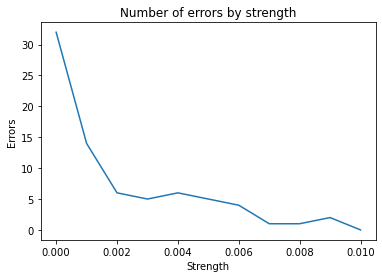

In [7]:
if __name__ == '__main__':
    errors = []
    mesh = igl.read_triangle_mesh("source_models/bunny.ply")
    num_submeshes = round(len(mesh[0])/500)
    strengths = [x * 0.001 for x in range(0, 11)]
    print(strengths)
    print(mesh[0])
    print(mesh[1])
    for i in strengths:
        errors.append(embed_and_extract(num_submeshes,i))

    
    x = strengths        
    y = errors
    plt.title("Number of errors by strength") 
    plt.xlabel("Strength") 
    plt.ylabel("Errors") 
    plt.plot(x,y)
    plt.show()
